<h1>Lab 1: Geoprocessing</h1>
<h3>Neighborhood Resurrection, Part 1: <em>Mapping a refugee route to Sudan in 1980s Ethiopia</em></h3>

<h5>Lab 1 Objective and Workflow:</h5>
<p>This script looks to clean, merge, layer, and append DEM</p>

<h5><strong>Data Sources:</strong></h5>
<ul>
    <li>Elevation -- OpenTopography API</li>
    <li>Conflict Events -- UCDP Ethiopia and Sudan (1989)</li>
    <li>Refugee Camp Points -- UNHCR</li>
    <li>Subnational Administrative Boundaries -- ArcGIS Basemap</li>
</ul>

#### Imports

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [ ]:
import arcpy

In [ ]:
arcpy.env.workspace = r"C:\Users\mtadesse\Downloads\Lab1"
arcpy.env.overwriteOutput = True

In [ ]:
# Listed files
file_tiles = [
    "tile_sw.tif",
    "tile_se.tif",
    "tile_nw.tif",
    "tile_ne.tif"
]

In [ ]:
## Combining tiles as rasters (using Mosaic to New Raster tool)
arcpy.management.MosaicToNewRaster(
    input_rasters = file_tiles,
    output_location=r"C:\Users\mtadesse\Downloads\Lab1",
    raster_dataset_name_with_extension="eth_sud_dem.tif",
    coordinate_system_for_the_raster=arcpy.SpatialReference(4326),
    pixel_type="16_BIT_SIGNED",
    number_of_bands=1,
    mosaic_method="FIRST",
)

<Result 'C:\\Users\\mtadesse\\Downloads\\Lab1\\eth_sud_dem.tif'>

In [ ]:
## reproject onto local UTM of midpoint
arcpy.ProjectRaster_management(
    in_raster = r"C:\Users\mtadesse\Downloads\Lab1\eth_sud_dem.tif",
    out_raster=r"C:\Users\mtadesse\Downloads\Lab1\dem_reprojected.tif",
    out_coor_system=arcpy.SpatialReference(32636)
)

<Result 'C:\\Users\\mtadesse\\Downloads\\Lab1\\dem_reprojected.tif'>

In [ ]:
## Either Elevation #2 or #9

In [ ]:
## Importing conflict events

In [ ]:
ethi = pd.read_csv('ethio.csv')
sud = pd.read_csv('sudan.csv')

In [ ]:
arcpy.management.XYTableToPoint(r"C:\Users\mtadesse\Downloads\Lab1\Lab1\sudan.csv", "sudan_conflicts",
                                "longitude", "latitude")

In [ ]:
arcpy.management.XYTableToPoint(r"C:\Users\mtadesse\Downloads\Lab1\Lab1\ethio.csv", "ethio_conflicts",
                                "longitude", "latitude")

<Result 'C:\\Users\\mtadesse\\Downloads\\Lab1\\ethio_conflicts.shp'>

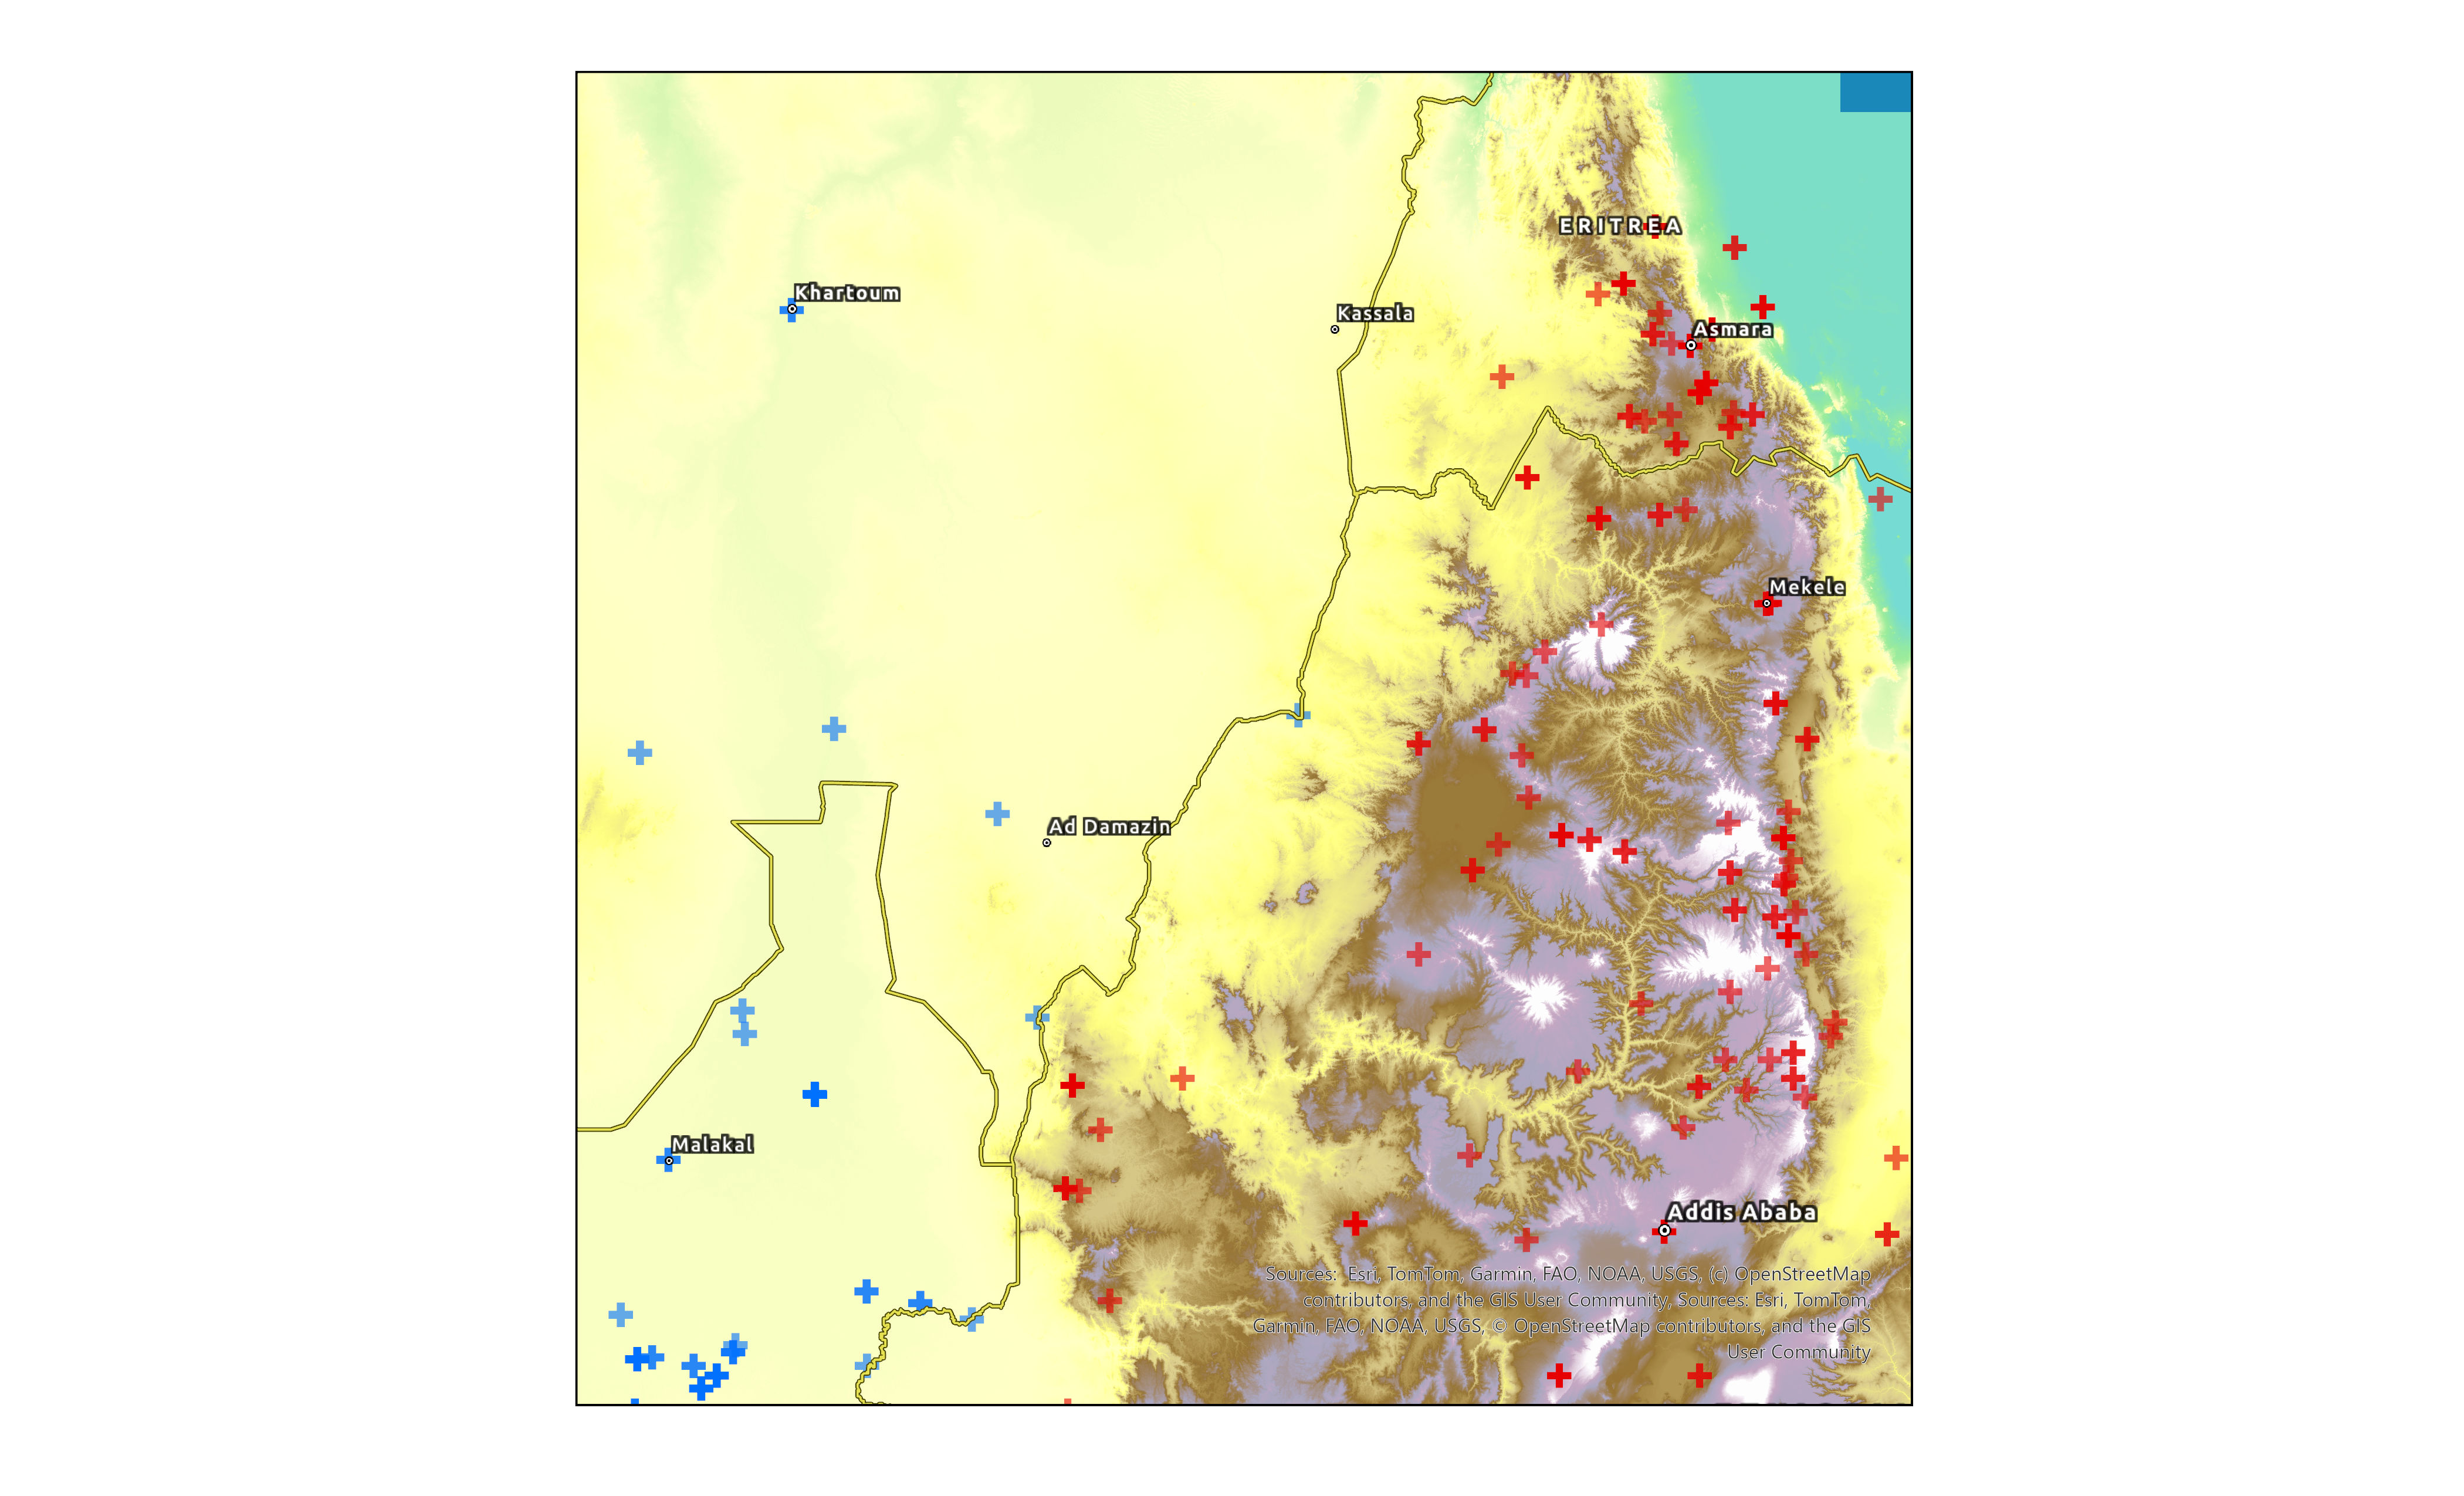

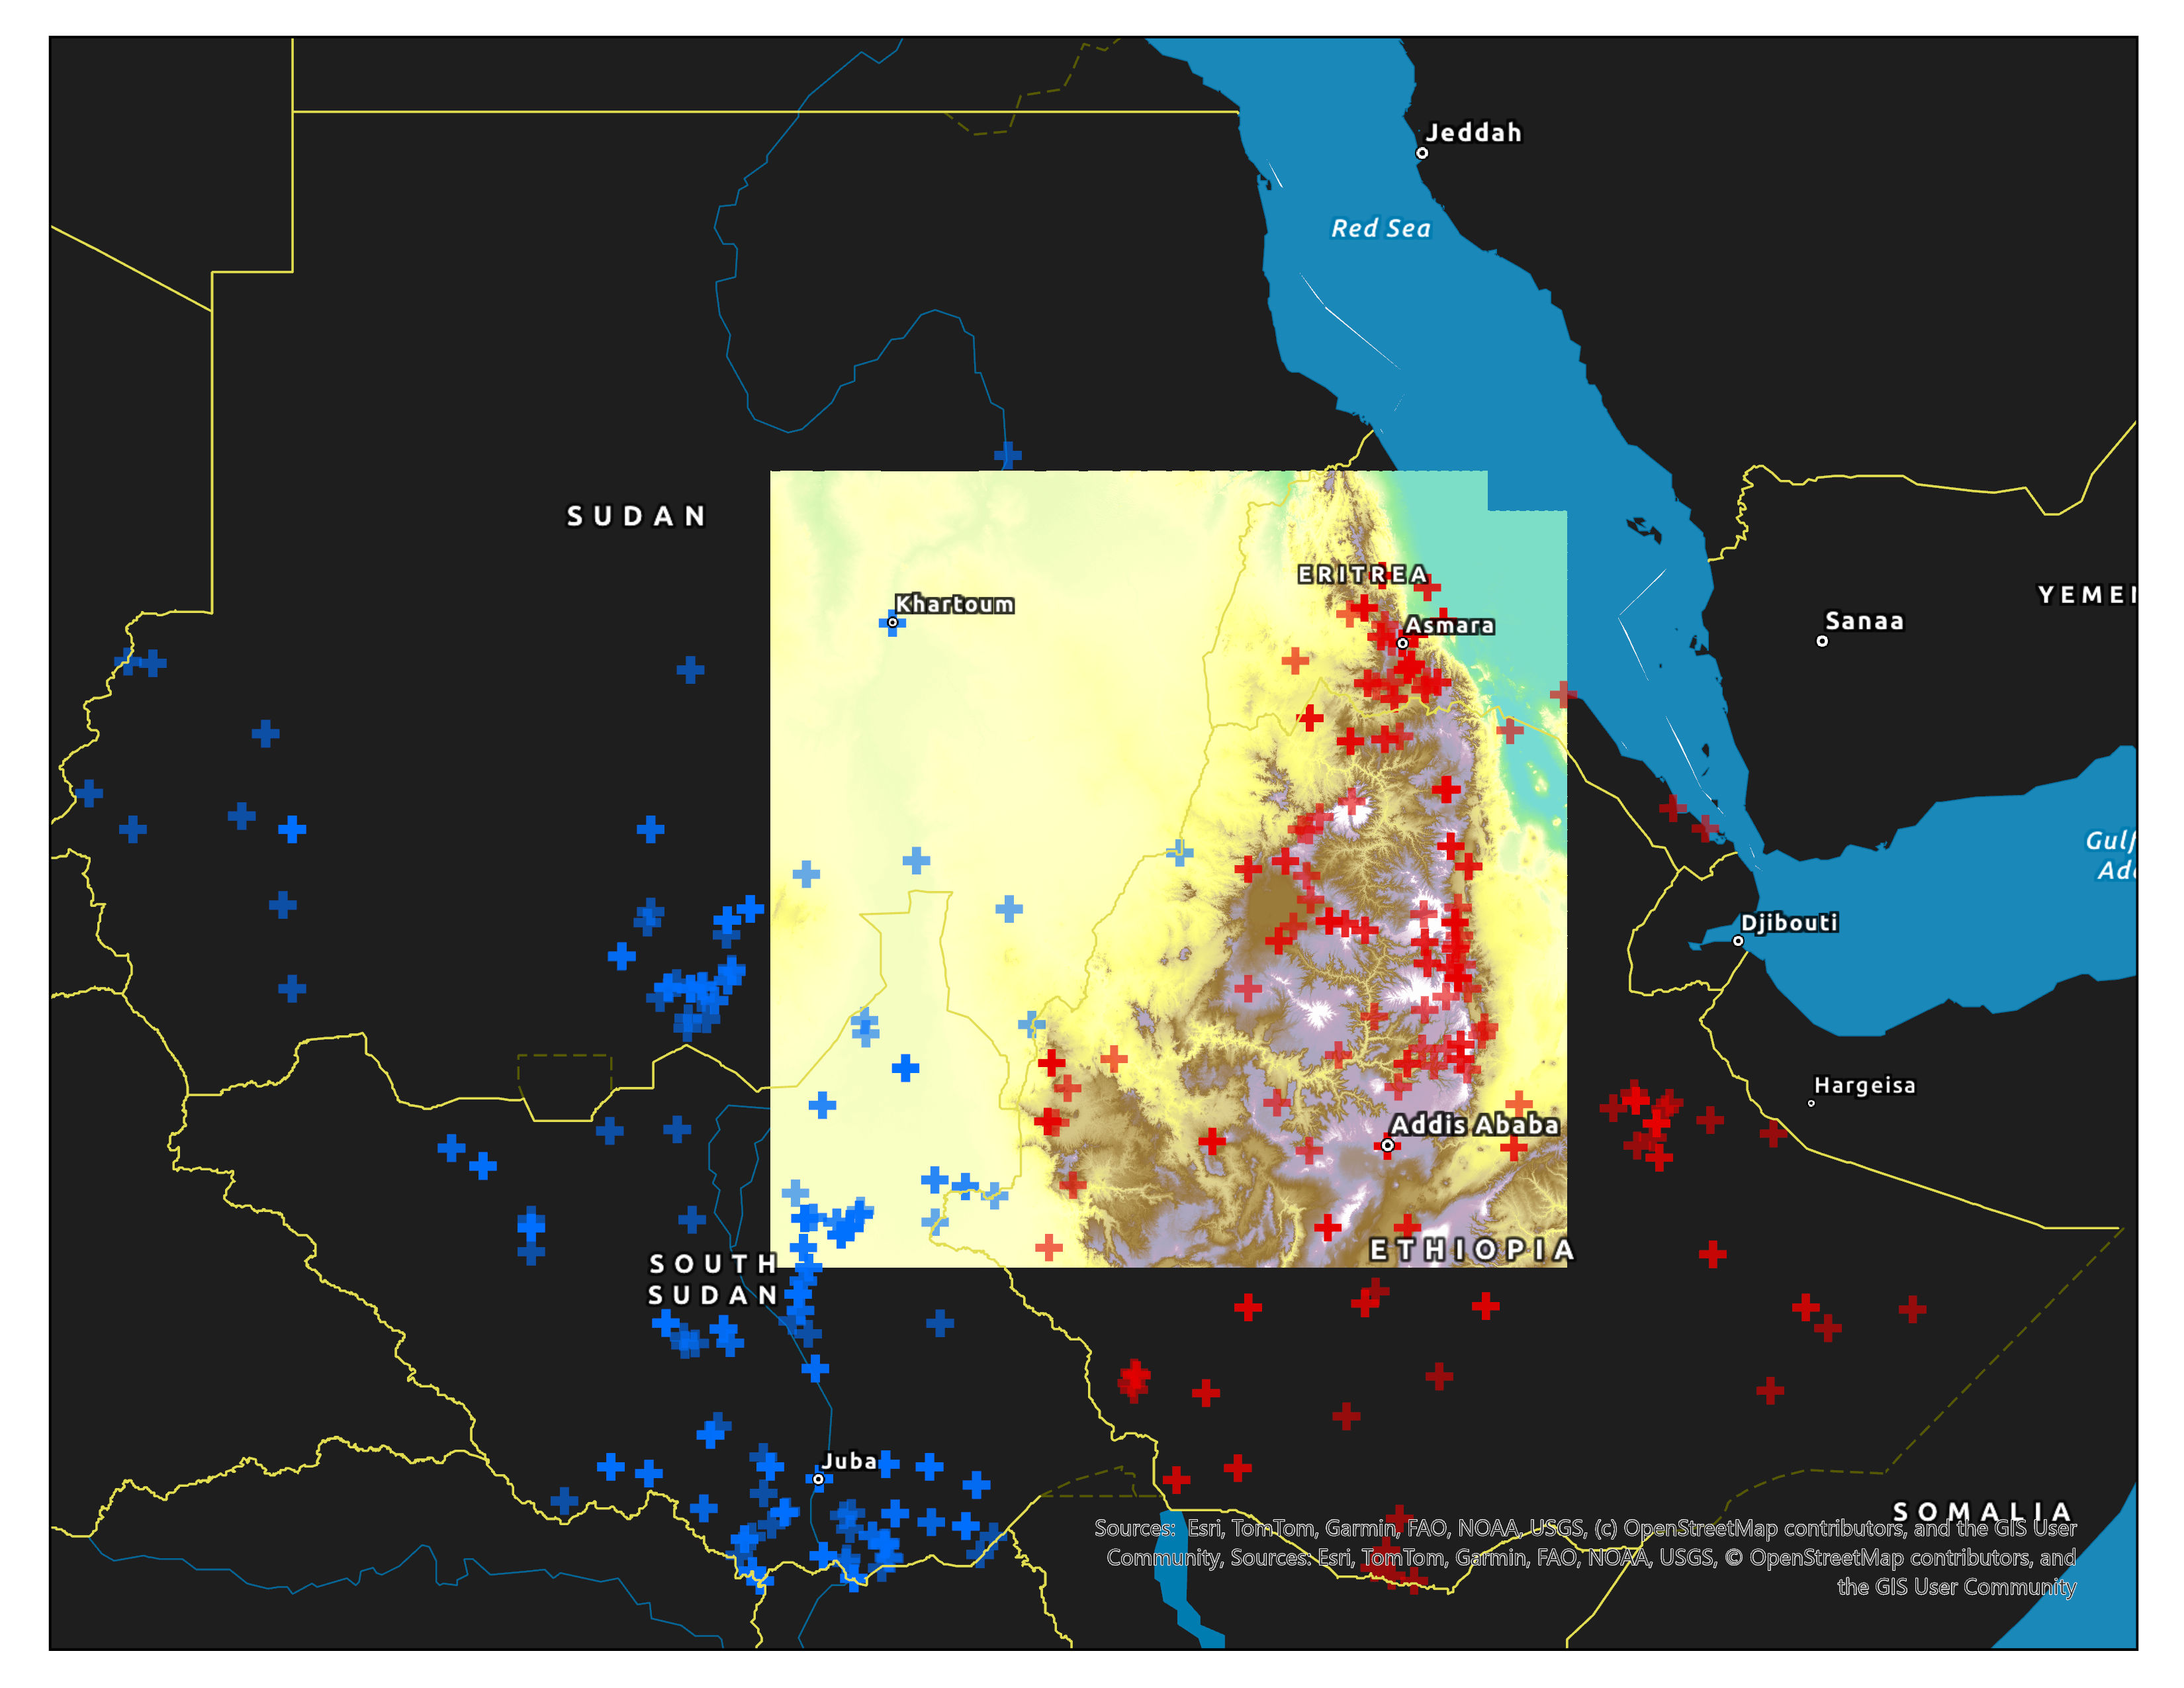